In [1]:
import numpy as np   # Downloading numpy for array format
import pandas as pd  # Downloading pandas for data import
import matplotlib.pyplot as plt # Matplotlib.pyplot for visualization
import seaborn as sns  # Visualisation
%matplotlib inline 

In [2]:
oil_prices=pd.read_csv('crude_oil_import_prices.csv') # importing the dataset

oil_prices.head(10)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN
5,AUS,OILIMPPRICE,TOT,USD_BAR,A,1985,28.17,NaN
6,AUS,OILIMPPRICE,TOT,USD_BAR,A,1986,14.49,NaN
7,AUS,OILIMPPRICE,TOT,USD_BAR,A,1987,19.00,NaN
8,AUS,OILIMPPRICE,TOT,USD_BAR,A,1988,15.93,NaN
9,AUS,OILIMPPRICE,TOT,USD_BAR,A,1989,17.63,NaN


In [3]:
oil_prices.shape # Getting shape  of data

(17360, 8)

In [4]:
oil_prices.info()   # checking nulls and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17360 entries, 0 to 17359
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    17360 non-null  object 
 1   INDICATOR   17360 non-null  object 
 2   SUBJECT     17360 non-null  object 
 3   MEASURE     17360 non-null  object 
 4   FREQUENCY   17360 non-null  object 
 5   TIME        17360 non-null  object 
 6   Value       9734 non-null   float64
 7   Flag Codes  7626 non-null   object 
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


In [5]:
oil_prices.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME           object
Value         float64
Flag Codes     object
dtype: object

In [6]:
oil_prices=oil_prices.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'Flag Codes'], axis=1)

oil_prices.head(5)

,LOCATION,FREQUENCY,TIME,Value
0,AUS,A,1980,31.81
1,AUS,A,1981,35.88
2,AUS,A,1982,35.42
3,AUS,A,1983,30.88
4,AUS,A,1984,29.19


In [7]:
oil_prices.dtypes

LOCATION      object
FREQUENCY     object
TIME          object
Value        float64
dtype: object

In [8]:
oil_prices.shape

(17360, 4)

In [9]:
oil_prices.describe()     # Basic statistical info - seems to skew to the left

,Value
count,9734.000000
mean,41.376256
std,31.575795
min,2.330000
25%,18.350000
50%,28.560000
75%,56.265000
max,142.290000


In [10]:
oil_prices=oil_prices.sort_values(by='TIME') # sort the data by year

oil_prices.head(10)
oil_prices.tail(5)

,LOCATION,FREQUENCY,TIME,Value
2833,JPN,Q,2016-Q2,41.95
2541,IRL,Q,2016-Q2,NaN
4439,TUR,Q,2016-Q2,NaN
4585,GBR,Q,2016-Q2,45.65
3709,PRT,Q,2016-Q2,NaN


In [11]:
oil_prices['TIME']=oil_prices['TIME'].str.slice(0, 4) # Removed extra characters from time column

oil_prices.tail(5)


,LOCATION,FREQUENCY,TIME,Value
2833,JPN,Q,2016,41.95
2541,IRL,Q,2016,NaN
4439,TUR,Q,2016,NaN
4585,GBR,Q,2016,45.65
3709,PRT,Q,2016,NaN


In [12]:
oil_prices.count()  # checking balance of observations between columns

LOCATION     17360
FREQUENCY    17360
TIME         17360
Value         9734
dtype: int64

In [13]:
oil_prices.shape # Checkpoint on shape

(17360, 4)

In [14]:
#duplicate_rows=oil_prices[oil_prices.duplicated()]

#print("number of duplicate rows:", duplicate_rows.shape)

In [15]:
print(oil_prices.isnull().sum())  # Looking for null values

LOCATION        0
FREQUENCY       0
TIME            0
Value        7626
dtype: int64


In [16]:
value_column_row_null= oil_prices[oil_prices['Value'].isnull()] # Seeing if any pattern in the null values

value_column_row_null.head(100)

,LOCATION,FREQUENCY,TIME,Value
252,FRA,A,1980,NaN
144,CZE,A,1980,NaN
828,TUR,A,1980,NaN
684,SVK,A,1980,NaN
612,POL,A,1980,NaN
...,...,...,...,...
14374,CHE,M,1980,NaN
7366,FIN,M,1980,NaN
16928,LUX,M,1980,NaN
12622,PRT,M,1980,NaN


In [17]:
oil_prices=oil_prices.dropna().reset_index(drop=True)

oil_prices.count()

LOCATION     9734
FREQUENCY    9734
TIME         9734
Value        9734
dtype: int64

In [18]:
oil_prices.shape

(9734, 4)

In [19]:
oil_prices.head(15)

,LOCATION,FREQUENCY,TIME,Value
0,AUS,A,1980,31.81
1,CAN,A,1980,30.21
2,USA,A,1980,33.39
3,GBR,A,1980,31.22
4,CHE,A,1980,34.68
5,SWE,A,1980,32.22
6,ESP,A,1980,32.25
7,DNK,A,1980,33.56
8,BEL,A,1980,29.93
9,NOR,A,1980,33.17


In [20]:
oil_prices= oil_prices[oil_prices['FREQUENCY']=='M'].reset_index(drop=True) 

oil_prices.head(20)      # removed all data that wasn't monthly for consistent interval frequency

,LOCATION,FREQUENCY,TIME,Value
0,ESP,M,1980,29.49
1,AUS,M,1980,27.81
2,AUT,M,1980,30.32
3,JPN,M,1980,31.70
4,GBR,M,1980,28.56
5,CAN,M,1980,26.21
6,DNK,M,1980,31.24
7,NLD,M,1980,28.40
8,BEL,M,1980,26.18
9,ITA,M,1980,28.59


<AxesSubplot:xlabel='Value'>

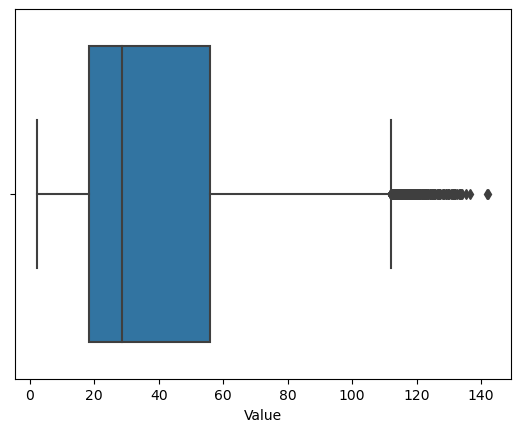

In [21]:
sns.boxplot(x=oil_prices['Value'])      # view of the data which is skewed to the left

In [22]:
oil_prices=oil_prices.sort_values(by=['TIME', 'LOCATION']).reset_index(drop=True)

In [23]:
oil_prices.tail(50)   # Data now sorted by year and alphabetically by countries within each year for trend

,LOCATION,FREQUENCY,TIME,Value
6566,FRA,M,2016,37.51
6567,FRA,M,2016,40.48
6568,FRA,M,2016,48.44
6569,GBR,M,2016,33.36
6570,GBR,M,2016,32.13
6571,GBR,M,2016,38.87
6572,GBR,M,2016,41.51
6573,GBR,M,2016,46.84
6574,GBR,M,2016,49.27
6575,ITA,M,2016,30.47


In [24]:
country_counts=oil_prices.groupby(['LOCATION', 'TIME']).size().reset_index(name='Count')

In [25]:
country_counts.head(50)  # counting how many months are recorded per country in each year for data consistency

,LOCATION,TIME,Count
0,AUS,1980,12
1,AUS,1981,12
2,AUS,1982,12
3,AUS,1983,12
4,AUS,1984,11
5,AUS,1985,11
6,AUS,1986,8
7,AUS,1987,9
8,AUS,1988,12
9,AUS,1989,11


In [26]:
oil_prices=oil_prices.merge(country_counts, on=['LOCATION', 'TIME'], how='left') # merging country_counts to oil_prices

In [27]:
oil_prices=pd.DataFrame(oil_prices)  #Ensuring is a dataframe format

In [28]:
oil_prices.head(5) # Checking the merge was successful

,LOCATION,FREQUENCY,TIME,Value,Count
0,AUS,M,1980,27.81,12
1,AUS,M,1980,29.81,12
2,AUS,M,1980,29.90,12
3,AUS,M,1980,31.30,12
4,AUS,M,1980,31.24,12


In [29]:
oil_prices.tail(5)

,LOCATION,FREQUENCY,TIME,Value,Count
6611,USA,M,2016,26.37,6
6612,USA,M,2016,30.34,6
6613,USA,M,2016,34.28,6
6614,USA,M,2016,38.86,6
6615,USA,M,2016,43.07,6


In [30]:
oil_prices=oil_prices[oil_prices['Count']==12] # Filtering for only TIME/LOCATION combinations with full 12 months worth of data

In [31]:
oil_prices.head(15)

,LOCATION,FREQUENCY,TIME,Value,Count
0,AUS,M,1980,27.81,12
1,AUS,M,1980,29.81,12
2,AUS,M,1980,29.90,12
3,AUS,M,1980,31.30,12
4,AUS,M,1980,31.24,12
5,AUS,M,1980,33.55,12
6,AUS,M,1980,33.83,12
7,AUS,M,1980,31.20,12
8,AUS,M,1980,33.12,12
9,AUS,M,1980,33.79,12


In [32]:
oil_prices.tail(20)

,LOCATION,FREQUENCY,TIME,Value,Count
6514,SWE,M,2015,60.74,12
6515,SWE,M,2015,60.74,12
6516,SWE,M,2015,57.06,12
6517,SWE,M,2015,47.78,12
6518,SWE,M,2015,46.71,12
6519,SWE,M,2015,48.31,12
6520,SWE,M,2015,44.11,12
6521,SWE,M,2015,37.46,12
6522,USA,M,2015,46.50,12
6523,USA,M,2015,45.69,12


In [33]:
oil_prices=oil_prices.drop(['FREQUENCY', 'Count'], axis=1) # Dropping unnecessary columns

oil_prices.head(5)

,LOCATION,TIME,Value
0,AUS,1980,27.81
1,AUS,1980,29.81
2,AUS,1980,29.90
3,AUS,1980,31.30
4,AUS,1980,31.24


In [34]:
oil_prices.tail(5)

,LOCATION,TIME,Value
6529,USA,2015,43.63
6530,USA,2015,39.71
6531,USA,2015,41.07
6532,USA,2015,38.79
6533,USA,2015,33.47


In [35]:
oil_prices.shape

(5820, 3)

In [36]:
non_scaled_oil_prices=oil_prices.iloc[:, 2].values   # Create numpy array from 'Value' column for keras module

type(non_scaled_oil_prices) # Checking it's the correct format

numpy.ndarray

## Min-Max Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler # Importing min-max scaler class for min-max scaling

In [38]:
scaler=MinMaxScaler() # Creating instance of the min-max scaler class

In [39]:
min_max_oil_prices=scaler.fit_transform(non_scaled_oil_prices.reshape(-1, 1)) # Performing min-max scaling on numpy array

In [40]:
min_max_oil_prices.shape # len(min_max_oil_prices)

(5820, 1)

In [41]:
x_training_data=[]        # Initialising two data structures for the timesteps
y_training_data=[] 

In [42]:
for i in range(50, len(min_max_oil_prices)):               # Populating the data structures for the timesteps
               x_training_data.append(min_max_oil_prices[i-50:i, 0])
               y_training_data.append(min_max_oil_prices[i, 0])

In [43]:
x_training_data=np.array(x_training_data)              # Converting to numpy arrays
y_training_data=np.array(y_training_data)

print(x_training_data.shape)

(5770, 50)


In [44]:
print(y_training_data.shape)

(5770,)


In [45]:
print(len(min_max_oil_prices)-50)  # Confirm arrays have correct shape, len(min_max_oil_prices) - 50 = 5770

5770


In [46]:
x_training_data=np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1)) 

print(x_training_data.shape)    # Turning numpy array 3 dimensional for tensorflow

(5770, 50, 1)


In [47]:
from tensorflow.keras.models import Sequential   # Classes for neural network building
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [48]:
rnn=Sequential()  # Initialising RNN

In [49]:
rnn.add(LSTM(units=5, return_sequences=True, input_shape=(x_training_data.shape[1], 1))) # First LSTM layer with flexible timestep approach

In [50]:
rnn.add(Dropout(0.2)) # Including 20% dropout rate as is convention

In [51]:
for i in [True, False]:            
    rnn.add(LSTM(units=5, return_sequences=i))
    rnn.add(Dropout(0.2))                            # Adding two more LSTM layers

In [52]:
rnn.add(Dense(units=1))   # Output layer

In [53]:
rnn.compile(optimizer='adam', loss='mean_squared_error') # optimizer and loss function

In [54]:
rnn.fit(x_training_data, y_training_data, epochs=10, batch_size=10)  # Fitting model to training data

Epoch 1/10
577/577 [==============================] - 49s 75ms/step - loss: 0.0110
Epoch 2/10
577/577 [==============================] - 42s 74ms/step - loss: 0.0067
Epoch 3/10
577/577 [==============================] - 42s 74ms/step - loss: 0.0062
Epoch 4/10
577/577 [==============================] - 44s 76ms/step - loss: 0.0059
Epoch 5/10
577/577 [==============================] - 44s 76ms/step - loss: 0.0057
Epoch 6/10
577/577 [==============================] - 44s 76ms/step - loss: 0.0058
Epoch 7/10
577/577 [==============================] - 44s 76ms/step - loss: 0.0058
Epoch 8/10
577/577 [==============================] - 44s 76ms/step - loss: 0.0060
Epoch 9/10
577/577 [==============================] - 44s 76ms/step - loss: 0.0058
Epoch 10/10
577/577 [==============================] - 44s 76ms/step - loss: 0.0057


## Z-Score scaling

In [56]:
from sklearn import preprocessing    # For creating a standard scaler

scaler=preprocessing.StandardScaler()  # Creating standard scaler

In [59]:
z_score_oil_prices=scaler.fit_transform(non_scaled_oil_prices.reshape(-1, 1))  # Performing z-score scaling on numpy array


In [60]:
z_score_oil_prices.shape # len(z_score_oil_prices)

(5820, 1)

In [61]:
x_training_data=[]        # Initialising two data structures for the timesteps
y_training_data=[] 

In [62]:
for i in range(50, len(z_score_oil_prices)):               # Populating the data structures for the timesteps
               x_training_data.append(z_score_oil_prices[i-50:i, 0])
               y_training_data.append(z_score_oil_prices[i, 0])

In [63]:
x_training_data=np.array(x_training_data)              # Converting to numpy arrays
y_training_data=np.array(y_training_data)

print(x_training_data.shape)

(5770, 50)


In [64]:
print(y_training_data.shape)

(5770,)


In [65]:
print(len(z_score_oil_prices)-50)  # Confirm arrays have correct shape, len(min_max_oil_prices) - 50 = 5770

5770


In [66]:
x_training_data=np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1)) 

print(x_training_data.shape)    # Turning numpy array 3 dimensional for tensorflow

(5770, 50, 1)


In [67]:
rnn=Sequential()  # Initialising RNN

In [68]:
rnn.add(LSTM(units=5, return_sequences=True, input_shape=(x_training_data.shape[1], 1))) # Replicating same parameters as min-max scaling round

In [69]:
rnn.add(Dropout(0.2)) # Replicating same dropout rate as min-max scaling round

In [70]:
for i in [True, False]:            
    rnn.add(LSTM(units=5, return_sequences=i))
    rnn.add(Dropout(0.2))                            # Replicating number of LSTM layers with min-max round

In [71]:
rnn.add(Dense(units=1))   # Identical output layer as min-max round

In [72]:
rnn.compile(optimizer='adam', loss='mean_squared_error') # Same optimizer and loss function as min-max round

In [73]:
rnn.fit(x_training_data, y_training_data, epochs=10, batch_size=10)  # Fitting model to z-score scaled training data

Epoch 1/10
577/577 [==============================] - 49s 78ms/step - loss: 0.3343
Epoch 2/10
577/577 [==============================] - 45s 77ms/step - loss: 0.1147
Epoch 3/10
577/577 [==============================] - 45s 78ms/step - loss: 0.1110
Epoch 4/10
577/577 [==============================] - 45s 78ms/step - loss: 0.1151
Epoch 5/10
577/577 [==============================] - 45s 78ms/step - loss: 0.1157
Epoch 6/10
577/577 [==============================] - 45s 78ms/step - loss: 0.1107
Epoch 7/10
577/577 [==============================] - 46s 79ms/step - loss: 0.1084
Epoch 8/10
577/577 [==============================] - 46s 79ms/step - loss: 0.1147
Epoch 9/10
577/577 [==============================] - 45s 78ms/step - loss: 0.1109
Epoch 10/10
577/577 [==============================] - 45s 78ms/step - loss: 0.1080
